In [4]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#save file or restart from here:
tag='Multispectral: ' 
tag_longdescription="Simulation for nadir viewing, 13 channel sensor [412, 443, 469, 488, 531, 547, 555, 645, 667, 678, 748, 859, 869] nm"
# read pickle file as dataframe
fdfe = pd.read_pickle('data/SQOOP_Jacek_v1_fdfe.pkl')
# display the dataframe
fdfe

,Windspeed(m_s),Humidity(%),FMF,AOD(867),chla(mg_m3),plastic_threshold,solz,relaz,senz,plastic_unc_median,SIC_median,plastic_avgK_median,DFS_median
0,1.0,0.0,0.5,0.1267,0.03,0.005928,10.0,0.0,NaN,0.003571,26.408431,0.999796,3.999790
1,1.0,0.0,0.5,0.1267,0.03,0.005924,10.0,10.0,NaN,0.003574,26.390359,0.999796,3.999789
2,1.0,0.0,0.5,0.1267,0.03,0.005926,10.0,20.0,NaN,0.003576,26.359669,0.999795,3.999789
3,1.0,0.0,0.5,0.1267,0.03,0.005938,10.0,30.0,NaN,0.003589,26.196528,0.999794,3.999787
4,1.0,0.0,0.5,0.1267,0.03,0.007802,35.0,0.0,NaN,0.004716,23.381112,0.999644,3.999634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,10.0,0.0,0.5,1.2668,1.00,0.401160,35.0,20.0,NaN,0.245490,12.920432,0.035757,3.025081
283,10.0,0.0,0.5,1.2668,1.00,0.401080,35.0,30.0,NaN,0.245398,12.591853,0.036477,3.018921
284,10.0,0.0,0.5,1.2668,1.00,0.403630,60.0,0.0,NaN,0.246530,14.320834,0.027569,3.025824
285,10.0,0.0,0.5,1.2668,1.00,0.403604,60.0,10.0,NaN,0.246480,13.952979,0.027961,3.024544


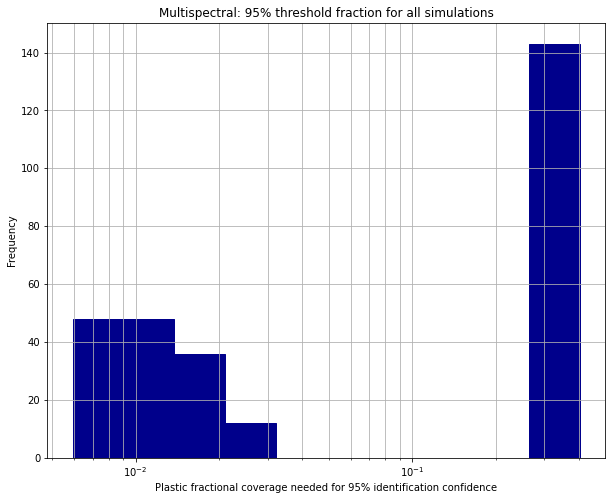

In [6]:
bn=10

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction for all simulations'
plt.title(titl)

this=fdfe['plastic_threshold']
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,label='FMF=0.01',color='darkblue',edgecolor='darkblue')

plt.xlabel('Plastic fractional coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')
plt.savefig('figures/SQOOP_Jacek_v01/SQOOP_Rodgers_ICA_threshold_all.pdf')
plt.show()

[1.0, 5.0, 10.0]


<ipython-input-7-09312c8b17f0>:13: RuntimeWarning: divide by zero encountered in log10
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
/Users/kknobels/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/kknobels/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


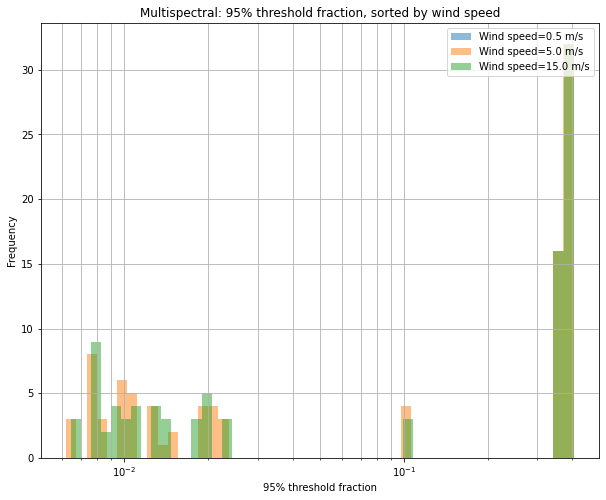

In [7]:
bn=50

a = fdfe['Windspeed(m_s)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by wind speed'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=0.5 m/s')

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==5.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=5.0 m/s')

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==10.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=15.0 m/s')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_windspeed.pdf')
plt.show()


[30.1, 70.0, 94.9]


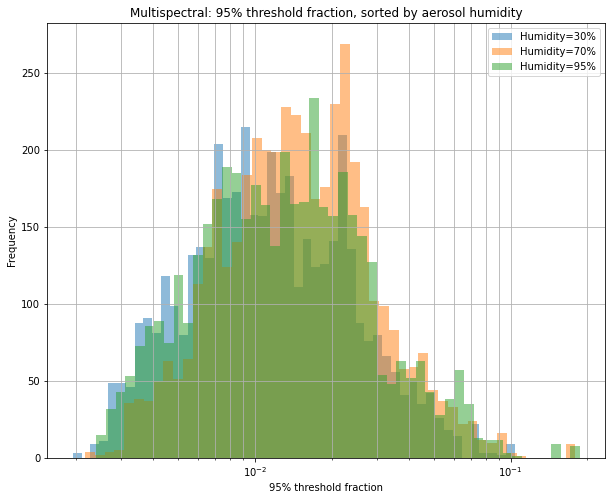

In [13]:
bn=50

a = fdfe['Humidity(%)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by aerosol humidity'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==30.1]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=30%')

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==70.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=70%')

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==94.9]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=95%')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_humidity.pdf')
plt.show()

[0.01, 0.5, 0.95]


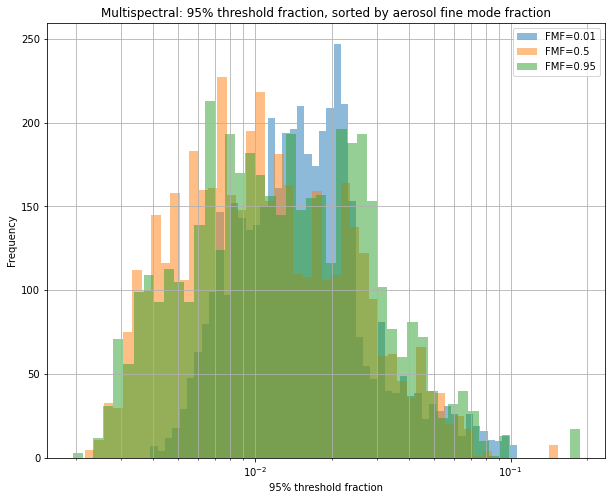

In [14]:
bn=50

a = fdfe['FMF'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by aerosol fine mode fraction'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['FMF']==0.01]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.01')

this=fdfe['plastic_threshold'][fdfe['FMF']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.5')

this=fdfe['plastic_threshold'][fdfe['FMF']==0.95]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.95')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_FMF.pdf')
plt.show()

[0.04, 0.07, 0.1, 0.15, 0.2, 0.3]


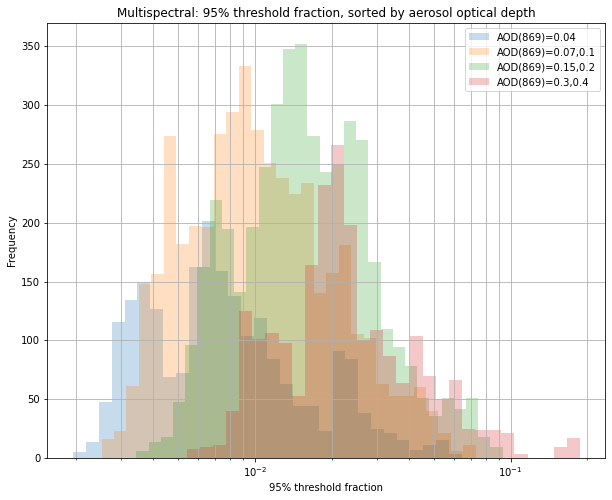

In [15]:
bn=30

a = fdfe['AOD(869)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by aerosol optical depth'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['AOD(869)']==0.04]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.04')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.07) | (fdfe['AOD(869)']==0.1)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.07,0.1')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.15) | (fdfe['AOD(869)']==0.2)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.15,0.2')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.3) | (fdfe['AOD(869)']==0.4)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.3,0.4')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_AOD.pdf')
plt.show()


[0.05, 0.5, 2.0]


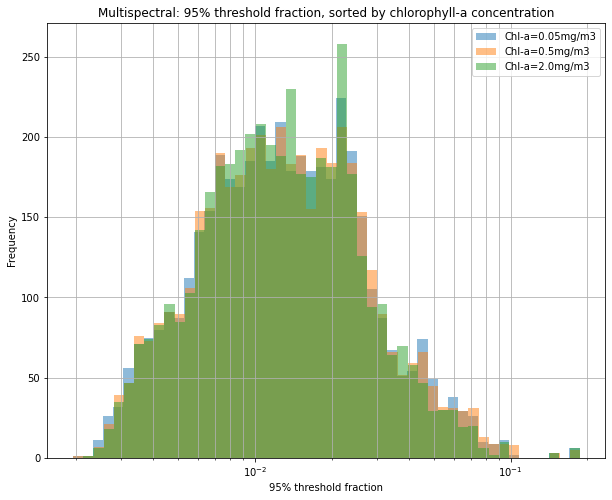

In [16]:
bn=50

a = fdfe['chla(mg_m3)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by chlorophyll-a concentration'
plt.title(titl)

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==0.05]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=0.05mg/m3')

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=0.5mg/m3')

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==2.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=2.0mg/m3')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_Chla.pdf')
plt.show()


[15.0, 30.0, 60.0]


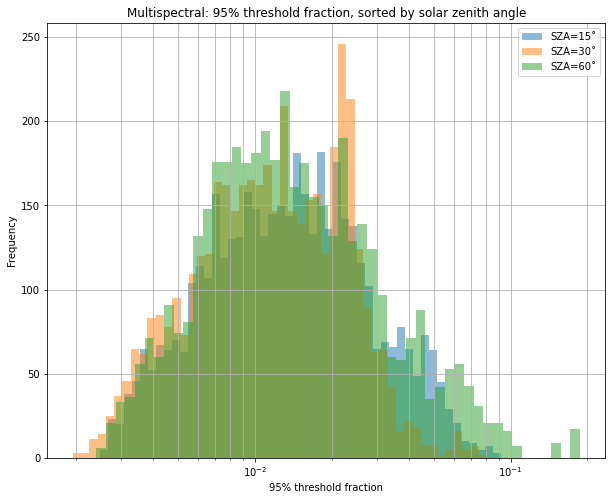

In [17]:
bn=50

a = fdfe['solz'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
titl=tag + '95% threshold fraction, sorted by solar zenith angle'
plt.title(titl)


this=fdfe['plastic_threshold'][fdfe['solz']==15.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=15˚')

this=fdfe['plastic_threshold'][fdfe['solz']==30.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=30˚')

this=fdfe['plastic_threshold'][fdfe['solz']==60.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=60˚')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_solz.pdf')
plt.show()


In [ ]:
#REMNANT SECTION IN CASE I EVER WANT TO PLOT INDIVIDUAL RESULTS


#make error covariance matrix and prepare jacobian for

#for idx in range(0, z_len):
for idx in range(0, 400):
    print(idx)

    rel_err = np.array([0.01587401, 0.01244266, 0.00938955, 0.01092051, 0.00302288,
                  0.00544271, 0.00999068, 0.01467843, 0.0080387, 0.00944394,
                  0.0193447, 0.0224503, 0.02386379])
    
    err=(meas[idx]*rel_err)**2

    
    #plotting specifics
    font1 = {'family':'serif','color':'black','size':20}
    font2 = {'family':'serif','color':'black','size':15}
    font3 = {'family':'courier new','color':'black','size':20}
    plt.figure(figsize=(16,16)) 
    plt.subplot(2, 2, 1)


    
    #plot simulated values
    plt.scatter(waveln,meas[idx])
    plt.errorbar(waveln,meas[idx],yerr=err,fmt='-')
    plt.title("Simulated data with error bars",fontdict = font1)
    plt.xlabel('Wavelength (nm)',fontdict = font2)
    plt.ylabel('$rho_t$', fontdict = font2)
    plt.ylim(0.0,0.4)

    #prepare jacobian
    this_jac=jac_all[idx]
    jac=this_jac.transpose()

    #plot jacobians
    plt.subplot(2, 2, 2)
    plt.plot(waveln,this_jac[:,0],'-',label='WS')
    plt.plot(waveln,this_jac[:,1],'-',label='RH')
    plt.plot(waveln,this_jac[:,2],'-',label='FMF')
    plt.plot(waveln,this_jac[:,3],'-',label='AOD')
    plt.plot(waveln,this_jac[:,4],'-',label='CHL')
    plt.plot(waveln,this_jac[:,5],'-',label='PF')
    plt.title("Jacobians",fontdict = font1)
    plt.xlabel('Wavelength (nm)',fontdict = font2)
    plt.ylabel('Parameter partial derivative', fontdict = font2)
    plt.ylim(-0.3,0.8)
    plt.legend()

    #calculate rodgers stuff
    S_hat, SIC, AvgK, DFS = rodgers(jac, err, ap)
    #print(df.iloc[idx])
    #print_out(S_hat, SIC, AvgK, DFS, jac, err, ap, 0, m_len, n_len, 0 )

    #calculate detection probability metrics
    inc=np.arange(0, 10000, 1)
    val=inc/10000
    det_prob=np.arange(0, 10000, 1) / 10000
    for x in inc:
        Pd, Pd_pcnt_str = detect_prob(val[x], np.sqrt(S_hat[5,5]), doprint=0)
        det_prob[x] = Pd
        

    df.loc[idx]["plastic_uncertainty"]=np.sqrt(S_hat[5,5])  
       
    plt.subplot(2, 2, 3)
    plt.plot(val,det_prob)
    plt.xscale('log')
    plt.title("Plastic detection probability",fontdict = font1)
    plt.xlabel('Plastic fraction',fontdict = font2)
    plt.ylabel('Probability for plastic fraction', fontdict = font2)

    plt.subplot(2, 2, 4)
    plt.axis('off')

    txt='SQOOP simulation # '+str(idx)
    plt.text(.05,0.95,txt,horizontalalignment='left',
         verticalalignment='center',fontdict=font3)
    plt.text(.05,0.55,str(df.loc[idx]),horizontalalignment='left',
         verticalalignment='center',fontdict=font3)    
    
    outname='figures/SQOOP'+str(idx)+'.png'
    plt.savefig(outname)
    plt.close()

